In [2]:
# import relevant libraries
%matplotlib inline
import json
import matplotlib
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

In [140]:
all_games = pd.read_csv(r'your file adress')

In [25]:
#Creation of Y 
dum = pd.get_dummies(all_games.card)
Y = dum[["Red Card","Second Yellow", "Yellow Card"]].sum(axis = 1)
all_games["card_y"] = Y


7342


Text(0, 0.5, 'Normalized faults')

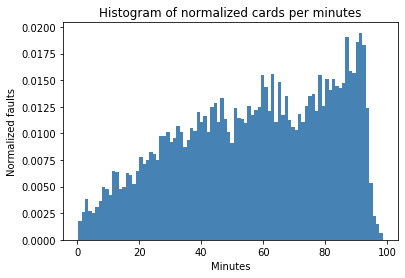

In [28]:
card_per_mn = all_games[all_games["card_y"] == 1]
print(len(card_per_mn))
plt.hist(card_per_mn["eventMinute"], bins=90, density = True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Histogram of normalized cards per minutes')
plt.xlabel('Minutes')
plt.ylabel('Normalized faults')

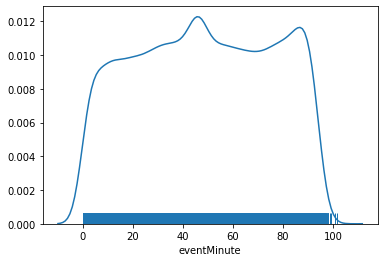

In [29]:
sns.distplot(all_games["eventMinute"], hist=False, rug=True);


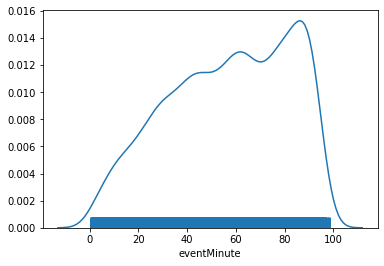

In [30]:
sns.distplot(card_per_mn["eventMinute"], hist=False, rug=True);


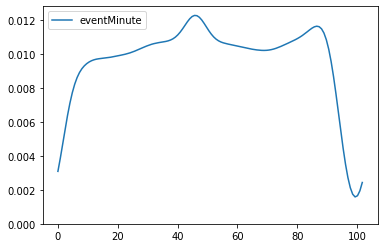

In [31]:
sns.kdeplot(all_games["eventMinute"], cut = 0)

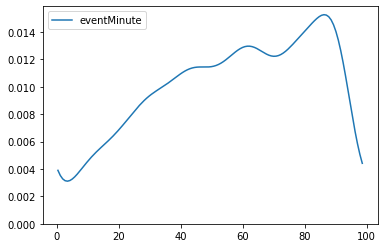

In [32]:
sns.kdeplot(card_per_mn["eventMinute"], cut = 0)

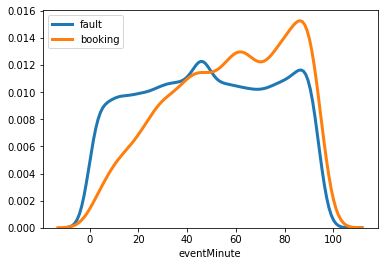

In [33]:
sns.distplot(all_games["eventMinute"], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "fault")
sns.distplot(card_per_mn["eventMinute"], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "booking")

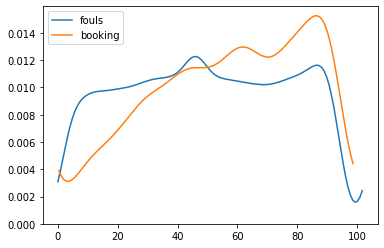

In [34]:
sns.kdeplot(all_games["eventMinute"], cut = 0, label = "fouls")
sns.kdeplot(card_per_mn["eventMinute"], cut = 0, label = "booking")

In [39]:
#player position
dum_position = pd.get_dummies(all_games["role,name"])
dum_position
dum_league = pd.get_dummies(all_games["competitionId"])

In [153]:
print(avgdf.index)

Int64Index([795, 412, 524, 426, 364], dtype='int64')


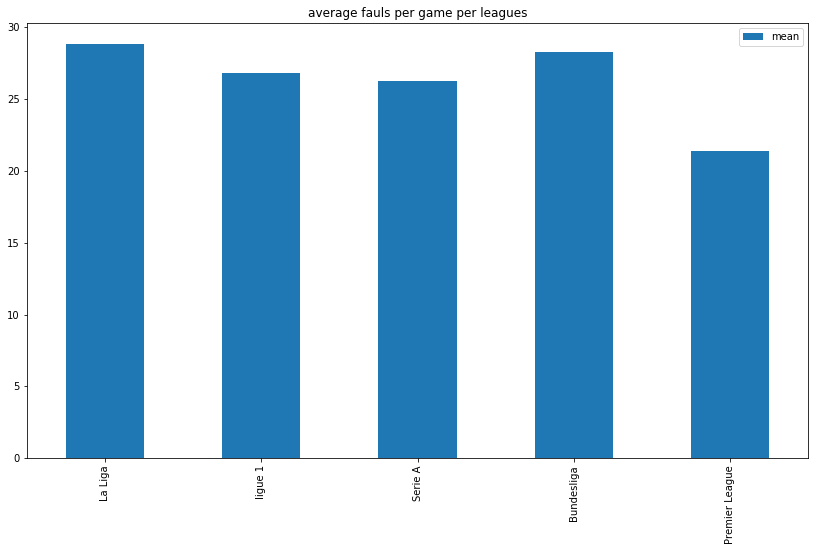

In [154]:
ax = all_games['competitionId'].value_counts()
avg = dict()
trans = {795: "La Liga", 524: "Serie A", 426: "Bundesliga", 364: "Premier League", 412: "ligue 1"}
for element in ax.index:        
    temp = all_games[all_games["competitionId"] == element]
    avg[trans[element]] = len(temp) / len(np.unique(temp.matchId))
avgdf = pd.DataFrame.from_dict(avg, orient = 'index', columns = ["mean"])
plt = avgdf.plot(kind='bar',figsize=(14,8), title="average fauls per game per leagues")
#std*2 up / down

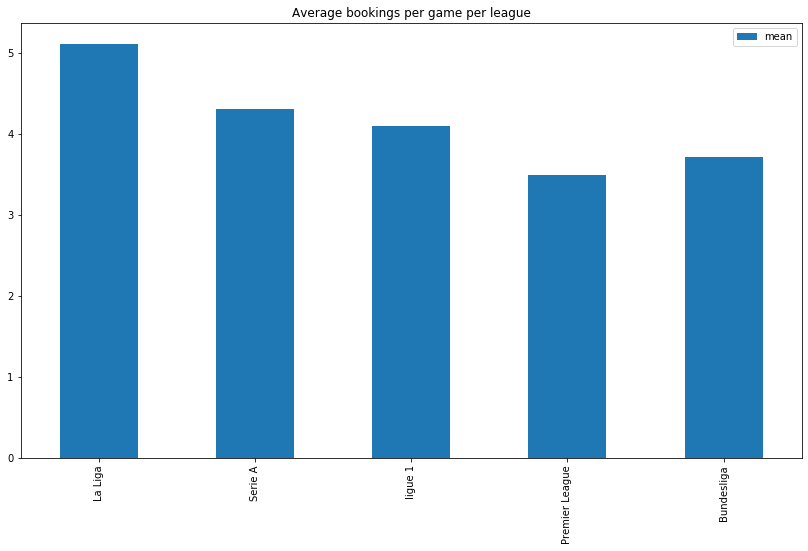

In [155]:
ax = card_per_mn['competitionId'].value_counts()
avg = dict()
trans = {795: "La Liga", 524: "Serie A", 426: "Bundesliga", 364: "Premier League", 412: "ligue 1"}
for element in ax.index:
    temp = card_per_mn[card_per_mn["competitionId"] == element]
    avg[trans[element]] = len(temp) / len(np.unique(temp.matchId))
avgcards = pd.DataFrame.from_dict(avg, orient = 'index', columns = ["mean"])
plt = avgcards.plot(kind='bar',figsize=(14,8), title="Average bookings per game per league")
#std*2 up / down

Text(0, 0.5, 'Frequency')

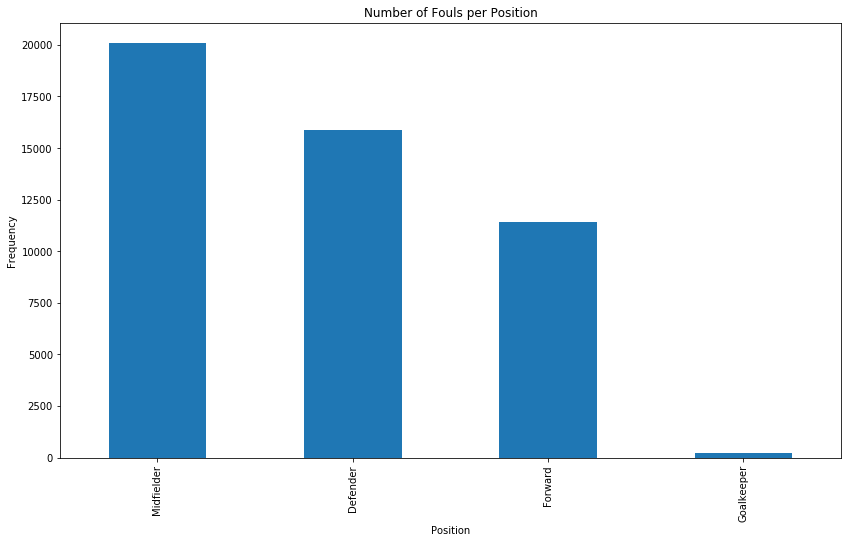

In [84]:
ax = all_games['role,name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Fouls per Position")
ax.set_xlabel("Position")
ax.set_ylabel("Frequency")


In [97]:
print(all_games.columns)
home_counter = 0
away_counter = 0
for idx, value in enumerate(all_games.name):
    if value.split() == all_games.home.iloc[idx].split():
        home_counter += 1
    else:
        away_counter +=1


Index(['Unnamed: 0', 'eventId', 'subEventName', 'tags', 'playerId',
       'positions', 'matchId', 'eventName', 'teamId', 'matchPeriod',
       'eventSec', 'subEventId', 'id', 'home', 'away', 'refId', 'gameweek',
       'competitionId', 'shortNameRef', 'name', 'shortNamePlayers',
       'role,name', 'homeScore', 'awayScore', 'eventMinute', 'x', 'y', 'card',
       'cum_faults_diff', 'cum_cards_diff', 'cum_cards', 'cum_faults',
       'Has a Yellow Card', 'FaultMovingAvg',
       'CumFaultOfPlayerCommittingFault', 'card_y'],
      dtype='object')


In [98]:
print(home_counter)
print(away_counter)

23626
24329


In [101]:
home_counterCard = 0
away_counterCard = 0
for idx, value in enumerate(card_per_mn.name):
    if value.split() == card_per_mn.home.iloc[idx].split():
        home_counterCard += 1
    else:
        away_counterCard +=1
print(home_counterCard)
print(away_counterCard)

3451
3891


Text(0, 0.5, 'Frequency')

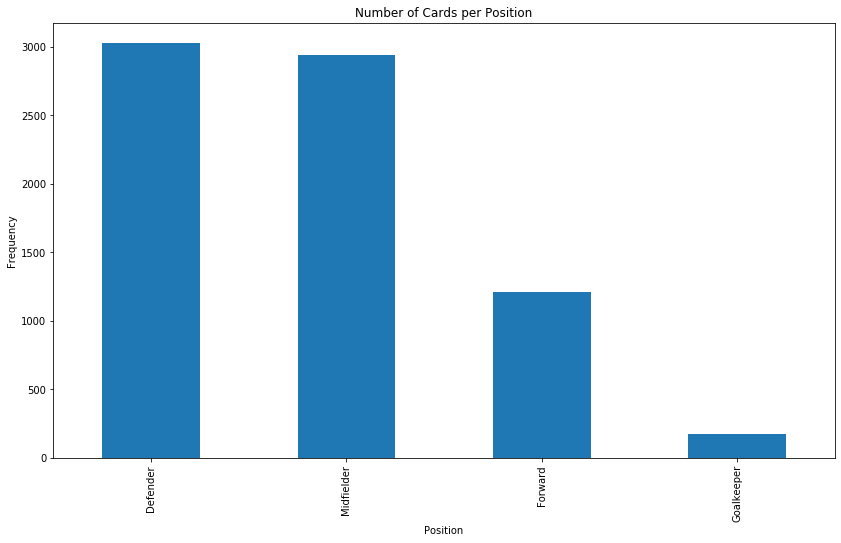

In [103]:
ax = card_per_mn['role,name'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Cards per Position")
ax.set_xlabel("Position")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

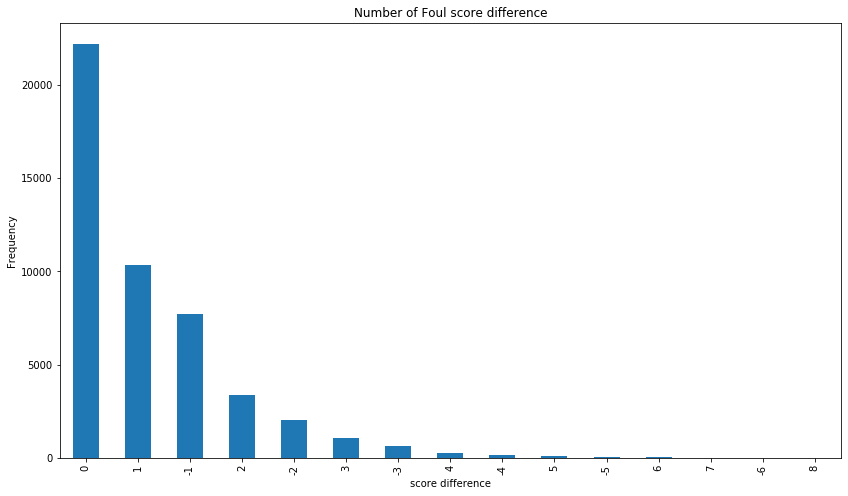

In [104]:
diff = all_games["homeScore"] - all_games["awayScore"]
ax = diff.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Foul score difference")
ax.set_xlabel("score difference")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

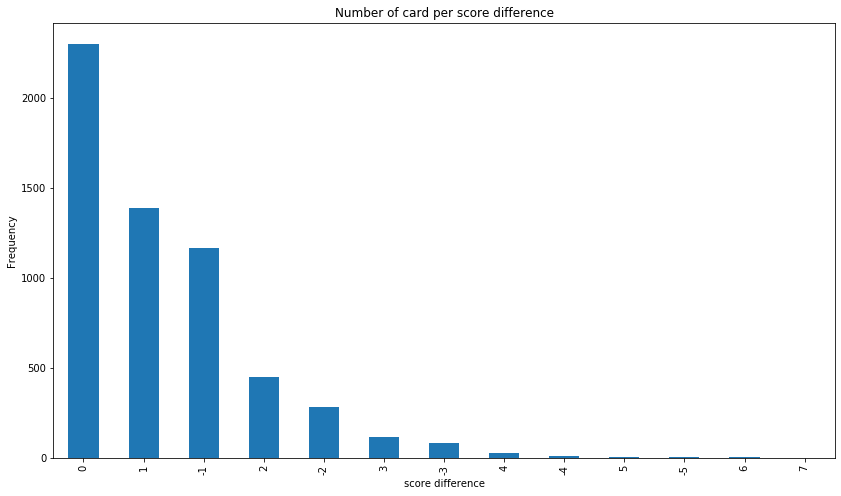

In [105]:
diff_carded = card_per_mn["homeScore"] - card_per_mn["awayScore"]

ax = diff_carded.value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of card per score difference")
ax.set_xlabel("score difference")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

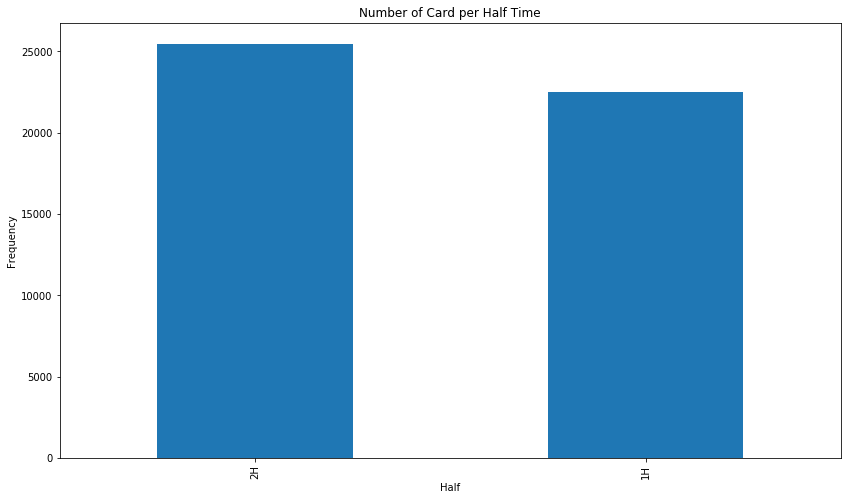

In [105]:
ax = all_games['matchPeriod'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of Card per Half Time")
ax.set_xlabel("Half")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'fool whistled')

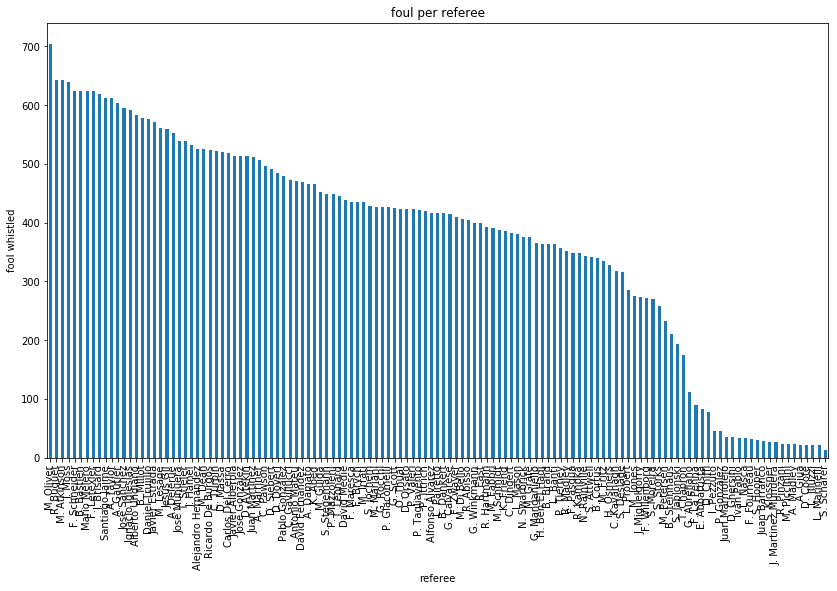

In [106]:
ax = all_games['shortNameRef'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="foul per referee")
ax.set_xlabel("referee")
ax.set_ylabel("fool whistled")

In [107]:
ax=all_games['shortNameRef'].value_counts()
avg = dict()
for element in ax.index:
    temp = all_games[all_games['shortNameRef'] == element]
    avg[element] = len(temp) / len(np.unique(temp.matchId))

                   mean
M. Oliver     23.500000
R. Buquet     29.227273
M. Atkinson   22.172414
J. Moss       22.821429
F. Schneider  31.250000
...                 ...
A. Giua       22.000000
D. Coote      22.000000
L. Illuzzi    21.000000
L. Marinelli  21.000000
S. Schärer    13.000000

[127 rows x 1 columns]
             mean
count  127.000000
mean    26.829087
std      4.567805
min     13.000000
25%     24.000000
50%     27.000000
75%     29.088816
max     46.000000


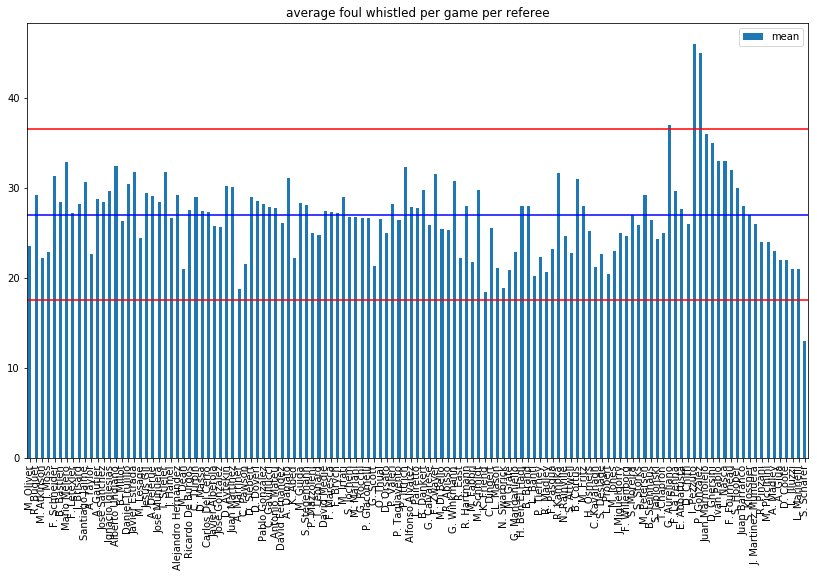

In [108]:
avgdf = pd.DataFrame.from_dict(avg, orient = 'index', columns = ["mean"])
print(avgdf)
plt = avgdf.plot(kind='bar',figsize=(14,8), title="average foul whistled per game per referee")
plt.axhline(36.5, color = "r")
plt.axhline(17.5, color = "r")
plt.axhline(27, color = "b")

print(avgdf.describe())

In [109]:
ax=card_per_mn['shortNameRef'].value_counts()
avg_card = dict()
for element in ax.index:
    temp = card_per_mn[card_per_mn['shortNameRef'] == element]
    avg_card[element] = len(temp) / len(np.unique(temp.matchId))


             mean
count  126.000000
mean     4.025015
std      1.041520
min      1.000000
25%      3.564732
50%      4.020833
75%      4.726471
max      6.555556


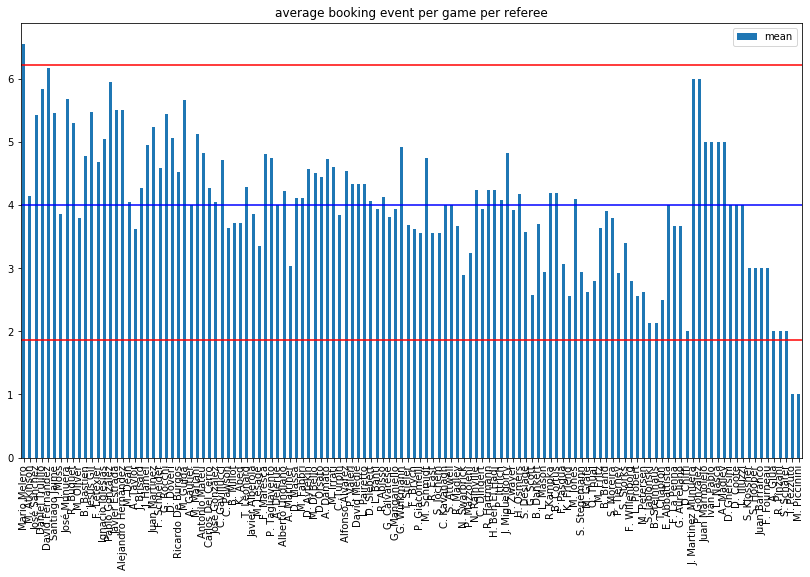

In [110]:
avgdf_card = pd.DataFrame.from_dict(avg_card, orient = 'index', columns = ["mean"])
plt = avgdf_card.plot(kind='bar',figsize=(14,8), title="average booking event per game per referee")
plt.axhline(6.22, color = "r")
plt.axhline(1.87, color = "r")
plt.axhline(4, color = "b")

print(avgdf_card.describe())

In [111]:
avg_c_f = dict()
for element in avg:
    avg_c_f[element] = avg_card[element]/avg[element]


KeyError: 'L. Marinelli'

             mean
count  125.000000
mean     0.151215
std      0.035439
min      0.021739
25%      0.132184
50%      0.153860
75%      0.175953
max      0.236170


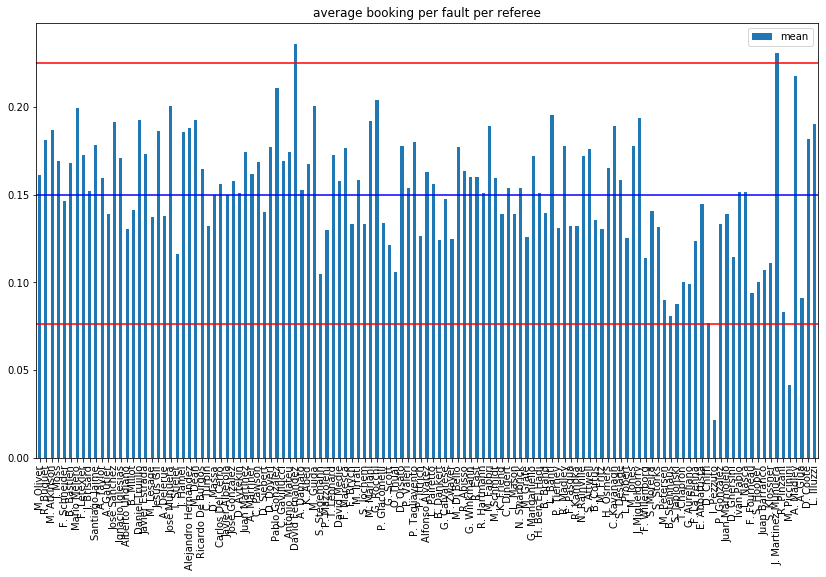

In [112]:
avgdftotal = pd.DataFrame.from_dict(avg_c_f, orient = 'index', columns = ["mean"])
plt = avgdftotal.plot(kind='bar',figsize=(14,8), title="average booking per fault per referee")
plt.axhline(0.225, color = "r")
plt.axhline(0.076, color = "r")
plt.axhline(0.15, color = "b")

print(avgdftotal.describe())

Text(0, 0.5, 'Frequency')

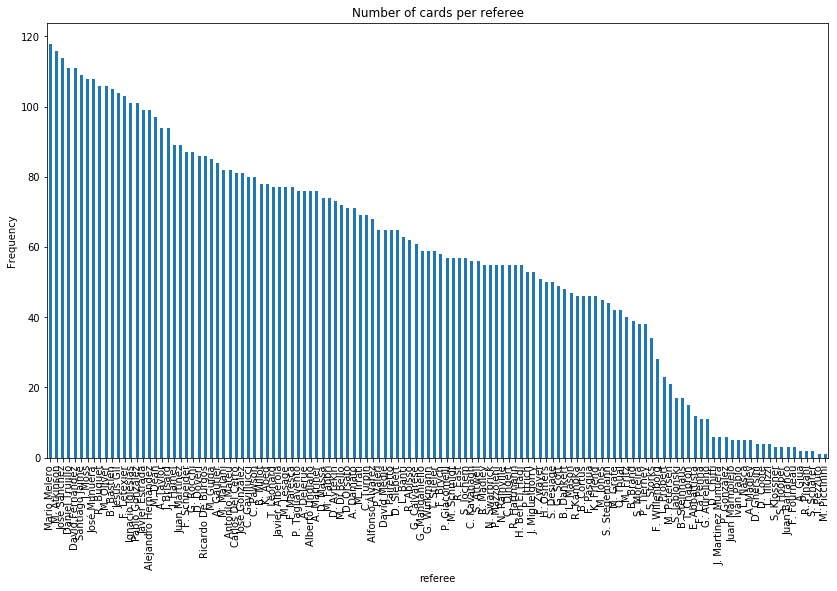

In [113]:
ag = card_per_mn['shortNameRef'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of cards per referee")
ag.set_xlabel("referee")
ag.set_ylabel("Frequency")

In [128]:
# import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
all_games = pd.read_csv(r'your file processed (cf Database Acquisition and Modelling)')

Text(0, 0.5, 'Density')

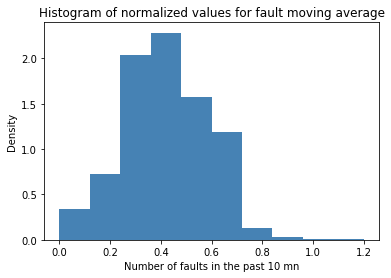

In [129]:
plt.hist(all_games["fault_moving_avg"], density = True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Histogram of normalized values for fault moving average')
plt.xlabel('Number of faults in the past 10 mn')
plt.ylabel('Density')

Text(0, 0.5, 'Normalized faults')

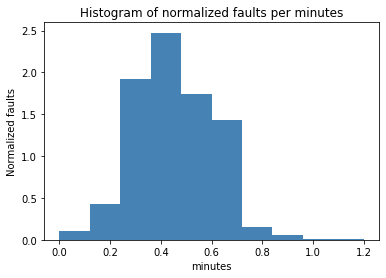

In [130]:
all_games_carded = all_games[all_games.card_y ==1]
plt.hist(all_games_carded["fault_moving_avg"], density = True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Histogram of normalized faults per minutes')
plt.xlabel('minutes')
plt.ylabel('Normalized faults')

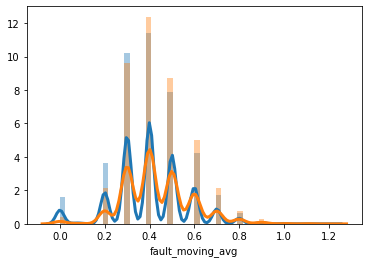

In [131]:
sns.distplot(all_games["fault_moving_avg"], hist = True, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "fault")
sns.distplot(all_games_carded["fault_moving_avg"], hist = True, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "booking")

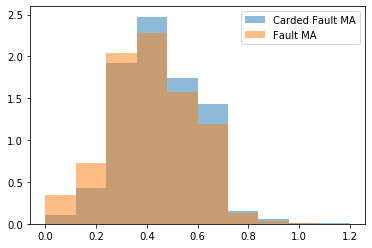

In [132]:
plt.hist(all_games_carded["fault_moving_avg"], label = "Carded Fault MA",histtype='stepfilled', density = True, alpha=0.5);
plt.hist(all_games["fault_moving_avg"], label = "Fault MA",histtype='stepfilled', density = True, alpha=0.5);
plt.legend(loc = "best")
plt.show()

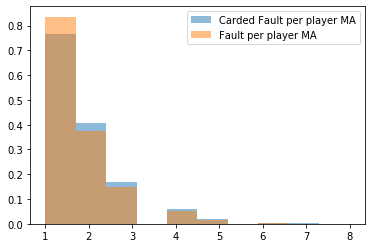

In [133]:
plt.hist(all_games_carded["cum_fault_of_player"], label = "Carded Fault per player MA", density = True, alpha=0.5);
plt.hist(all_games["cum_fault_of_player"], label = "Fault per player MA", density = True, alpha=0.5);
plt.legend(loc = "best")
plt.show()

In [135]:
all_games.columns
all_games_when_carded = all_games[all_games["Has_a_yellow_card"] == 1]

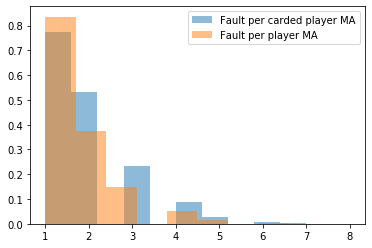

In [136]:
plt.hist((all_games_when_carded["cum_fault_of_player"]-1), label = "Fault per carded player MA", density = True, alpha=0.5);
plt.hist(all_games["cum_fault_of_player"], label = "Fault per player MA", density = True, alpha=0.5);
plt.legend(loc = "best")
plt.show()